# Answer 4.1

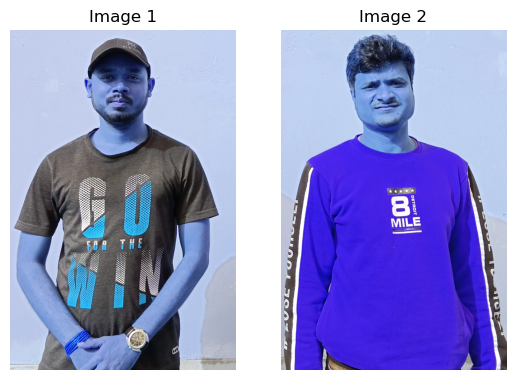

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Images A and B
img_a=cv2.imread('C:\\Users\\rajav\\Downloads\\EE722\\Assignment_3\\Input\\Q2_Image_A.jpg')
img_b=cv2.imread('C:\\Users\\rajav\\Downloads\\EE722\\Assignment_3\\Input\\Q2_Image_B.jpg')

#ROI 1
x1=800
x2=2100
y1=1500
y2=3460

#ROI 2
p1=2350
p2=3650
q1=1500
q2=3460

# imgA_roi=cv2.rectangle(img_a,(x1,y1),(x2,y2),(255,0,0),10)
# imgA_roi=cv2.rectangle(imgA_roi,(p1,q1),(p2,q2),(255,0,0),10)
shayan1 = img_a[y1:y2,x1:x2]
other1 = img_a[q1:q2,p1:p2]

a1=800
a2=2300
b1=2400
b2=3700

# imgB_roi=cv2.rectangle(img_b,(a1,y1),(a2,y2),(255,0,0),10)
# imgB_roi=cv2.rectangle(imgB_roi,(b1,q1),(b2,q2),(255,0,0),10)



plt.subplot(1, 2, 1)
plt.imshow(shayan1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(other1)
plt.title('Image 2')
plt.axis('off')

plt.show()

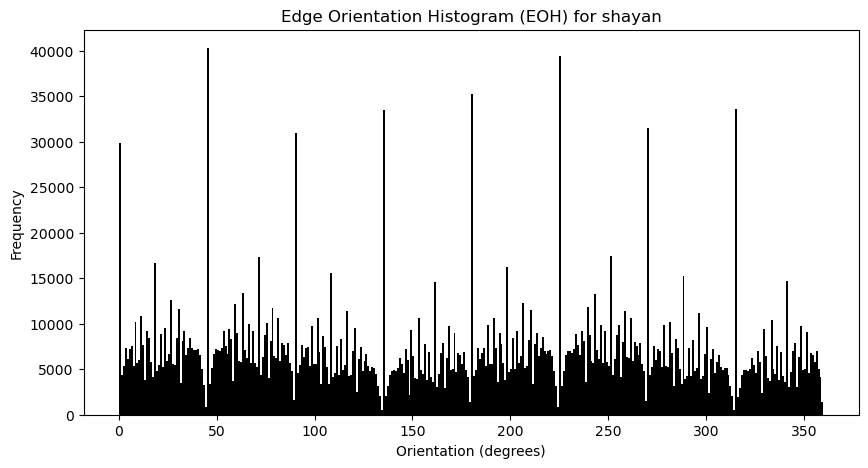

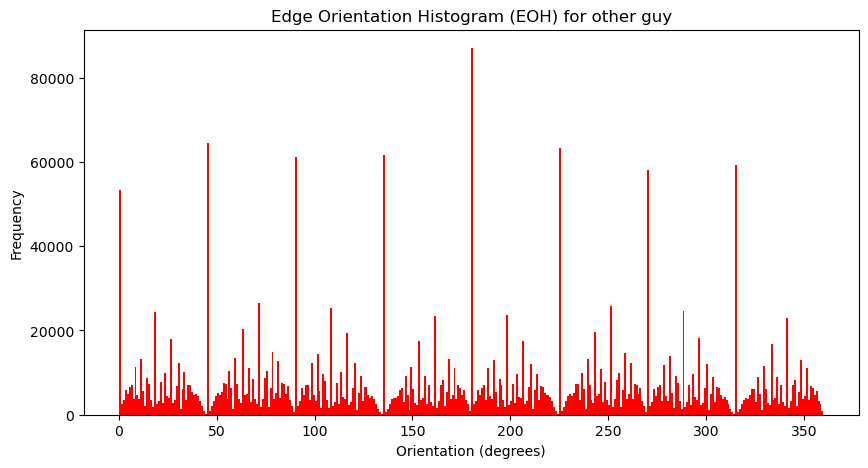

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_edge_orientation_histogram(image, num_bins=360):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Calculate gradient magnitude and orientation
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(dx**2 + dy**2)
    gradient_orientation = np.arctan2(dy, dx)

    # Convert orientation to degrees and map to the range [0, 2pi]
    gradient_orientation_deg = (gradient_orientation + np.pi) * (180 / np.pi) % 360

    # Compute the histogram of gradient orientations
    hist, bins = np.histogram(gradient_orientation_deg, bins=num_bins, range=(0, 360))

    return hist, bins



# Calculate and plot the edge orientation histogram
hist, bins = calculate_edge_orientation_histogram(shayan1)
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=1, color = 'black', align='edge')
plt.title('Edge Orientation Histogram (EOH) for shayan')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
hist1, bins1 = calculate_edge_orientation_histogram(other1)
plt.bar(bins1[:-1], hist1, width=1, color = 'red', align='edge')
plt.title('Edge Orientation Histogram (EOH) for other guy')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Frequency')
plt.show()

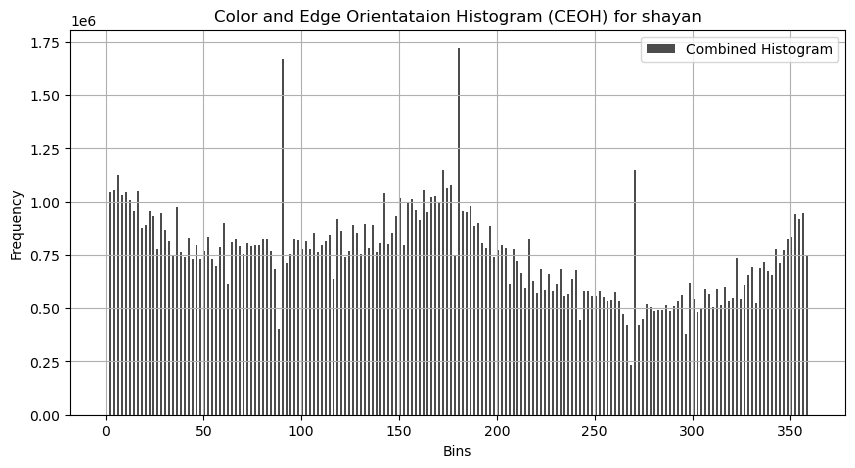

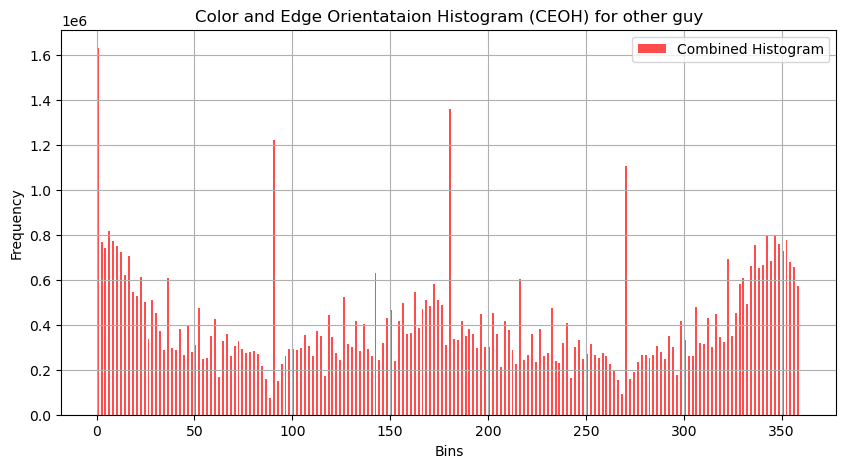

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_combined_histogram(image, num_bins=180):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate the histogram for hue and saturation
    hist_hue = cv2.calcHist([hsv], [0], None, [num_bins], [0, 180])
    hist_saturation = cv2.calcHist([hsv], [1], None, [num_bins], [0, 256])

    # Normalize histograms
    hist_hue /= np.sum(hist_hue)
    hist_saturation /= np.sum(hist_saturation)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate gradient magnitude and orientation
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(dx**2 + dy**2)
    gradient_orientation = np.arctan2(dy, dx)

    # Convert orientation to degrees and map to the range [0, 180]
    gradient_orientation_deg = (gradient_orientation + np.pi) * (180 / np.pi) % 180

    # Compute the histogram of gradient orientations weighted by magnitude
    hist_gradient_orientation = np.histogram(gradient_orientation_deg, bins=num_bins, range=(0, 180), weights=gradient_magnitude)[0]

    # Combine histograms with alternate bins reserved
    combined_histogram = np.zeros(num_bins * 2)
    combined_histogram[0::2] = hist_gradient_orientation
    combined_histogram[1::2] = hist_saturation.squeeze()  # Remove the singleton dimension

    return combined_histogram

def plot_combined_histogram(combined_histogram, num_bins=180):
    bins_combined = np.arange(num_bins * 2 + 1)

    plt.figure(figsize=(10, 5))
    plt.bar(bins_combined[:-1], combined_histogram, width=1, align='edge', color='blue', alpha=0.7, label='Combined Histogram')

    plt.title('Combined Histogram (Gradient Orientation and Saturation)')
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()


num_bins=180
# Calculate combined histogram
combined_histogram = calculate_combined_histogram(shayan1)
bins_combined = np.arange(num_bins * 2 + 1)

plt.figure(figsize=(10, 5))
plt.bar(bins_combined[:-1], combined_histogram, width=1, align='edge', color='black', alpha=0.7, label='Combined Histogram')

plt.title('Color and Edge Orientataion Histogram (CEOH) for shayan')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

combined_histogram = calculate_combined_histogram(other1)
bins_combined = np.arange(num_bins * 2 + 1)

plt.figure(figsize=(10, 5))
plt.bar(bins_combined[:-1], combined_histogram, width=1, align='edge', color='red', alpha=0.7, label='Combined Histogram')

plt.title('Color and Edge Orientataion Histogram (CEOH) for other guy')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


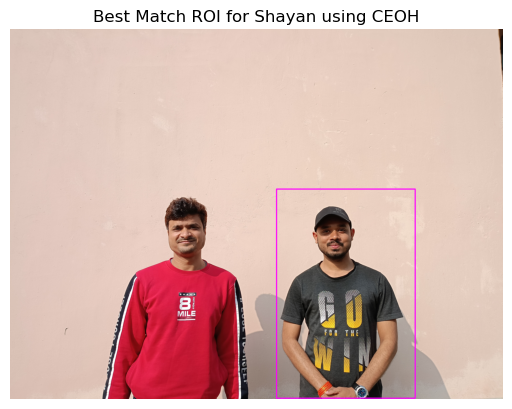

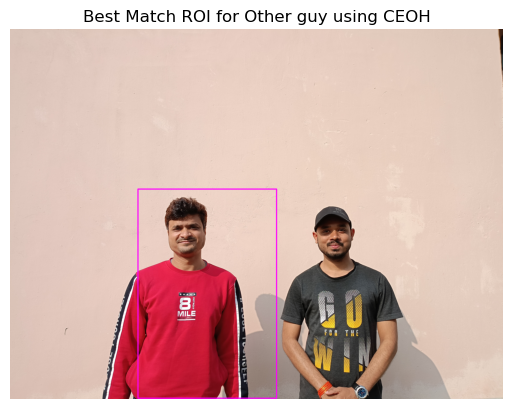

In [6]:
def calculate_bhattacharyya_coefficient(hist1, hist2):
    # Calculate Bhattacharyya coefficient between two histograms
    coeff = np.sum(np.sqrt(hist1 * hist2))
    return coeff

def find_best_match_roi(image, reference_roi, stride,reference_histogram):
    num_bins=180
    # Get the dimensions of the reference ROI
    ref_height, ref_width = reference_roi.shape[:2]

    # Initialize variables to store the best match information
    best_match_coefficient = 0
    best_match_position = None

    # Iterate over the image with the given stride
    for y in range(0, image.shape[0] - ref_height + 1, stride[0]):
        for x in range(0, image.shape[1] - ref_width + 1, stride[1]):
            # Extract the current ROI
            current_roi = image[y:y+ref_height, x:x+ref_width]

            # Calculate the combined histogram for the current ROI
            hist_current_roi = calculate_combined_histogram(current_roi, num_bins)

            # Calculate Bhattacharyya coefficient between histograms
            coeff = calculate_bhattacharyya_coefficient(hist_current_roi, reference_histogram)

            # Update best match information if a better match is found
            if coeff > best_match_coefficient:
                best_match_coefficient = coeff
                best_match_position = (x, y)

    return best_match_position

def draw_rectangle(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x + ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

def draw_rectangle1(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x - ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

# Load the input image and reference ROI
input_image = img_b
reference_roi = shayan1

# Set the stride and number of bins
stride = (500,500)
num_bins = 180

# Calculate the reference histogram
reference_histogram = calculate_combined_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride,reference_histogram)

# Draw the rectangle on the input image
output_image = draw_rectangle(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI for Shayan using CEOH')
plt.axis('off')
plt.show()

reference_roi = other1

stride = (500,500)

reference_histogram = calculate_combined_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride,reference_histogram)

# Draw the rectangle on the input image
output_image = draw_rectangle1(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI for Other guy using CEOH')
plt.axis('off')
plt.show()


1960 1300


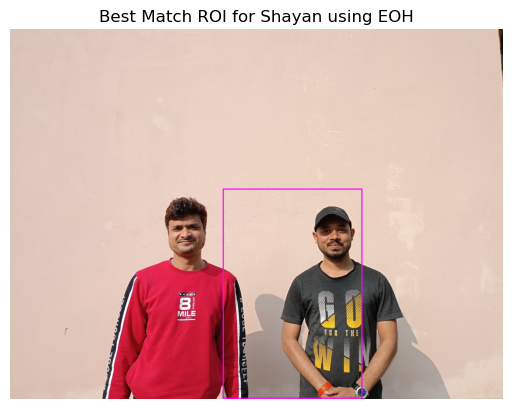

1960 1300


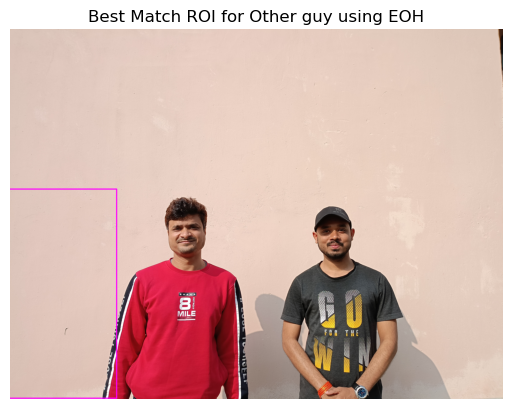

In [7]:
def calculate_bhattacharyya_coefficient(hist1, hist2):
    # Calculate Bhattacharyya coefficient between two histograms
    coeff = np.sum(np.sqrt(hist1 * hist2))
    return coeff

def find_best_match_roi(image, reference_roi, stride,reference_histogram):
    num_bins=180
    # Get the dimensions of the reference ROI
    ref_height, ref_width = reference_roi.shape[:2]
    print(ref_height, ref_width)

    # Initialize variables to store the best match information
    best_match_coefficient = 0
    best_match_position = None

    # Iterate over the image with the given stride
    for y in range(0, image.shape[0] - ref_height + 1, stride[0]):
        for x in range(0, image.shape[1] - ref_width + 1, stride[1]):
            # Extract the current ROI
            current_roi = image[y:y+ref_height, x:x+ref_width]

            # Calculate the combined histogram for the current ROI
            hist_current_roi, _ = calculate_edge_orientation_histogram(current_roi, num_bins)

            # Calculate Bhattacharyya coefficient between histograms
            coeff = calculate_bhattacharyya_coefficient(hist_current_roi, reference_histogram)

            # Update best match information if a better match is found
            if coeff > best_match_coefficient:
                best_match_coefficient = coeff
                best_match_position = (x, y)

    return best_match_position

def draw_rectangle(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x + ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

def draw_rectangle1(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x - ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

# Load the input image and reference ROI
input_image = img_b
reference_roi = shayan1

# Set the stride and number of bins
stride = (500,500)
num_bins = 180

# Calculate the reference histogram
reference_histogram, _ = calculate_edge_orientation_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride,reference_histogram)

# Draw the rectangle on the input image
output_image = draw_rectangle(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI for Shayan using EOH')
plt.axis('off')
plt.show()

reference_roi = other1

stride = (500,500)

reference_histogram, _ = calculate_edge_orientation_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride,reference_histogram)

# Draw the rectangle on the input image
output_image = draw_rectangle1(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI for Other guy using EOH')
plt.axis('off')
plt.show()


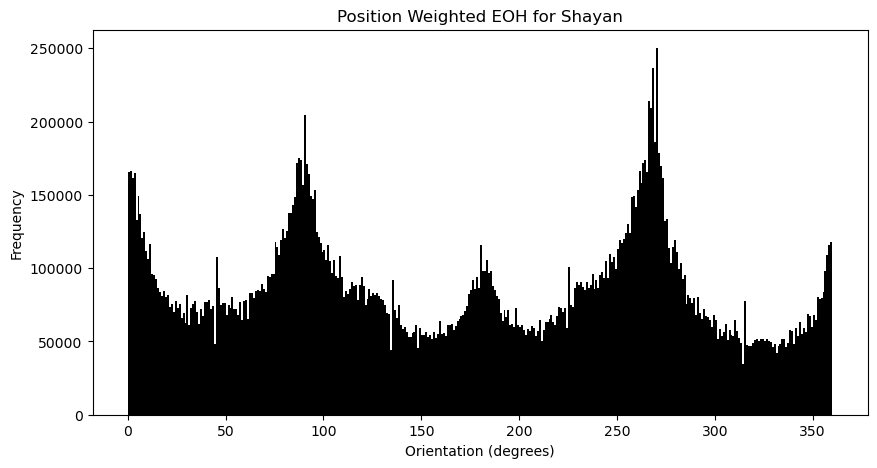

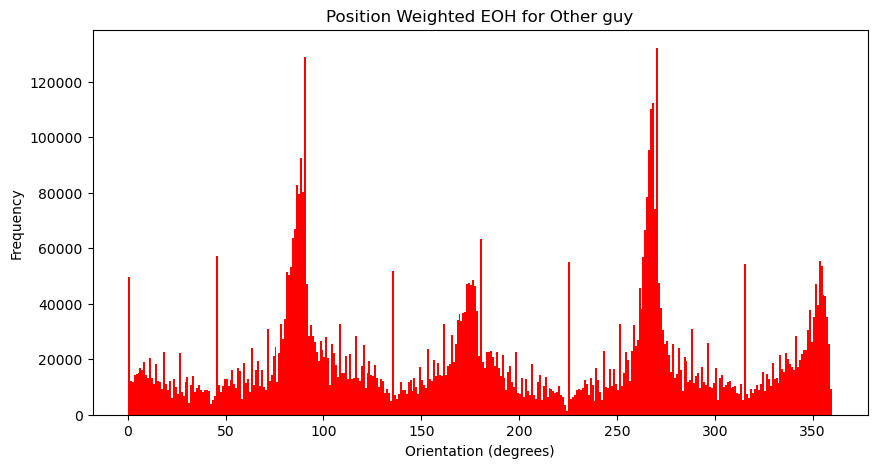

In [8]:
def calculate_position_weighted_edge_orientation_histogram(image, num_bins=360):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150)

    # Calculate gradient magnitude and orientation
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(dx**2 + dy**2)
    gradient_orientation = np.arctan2(dy, dx)

    # Convert orientation to degrees and map to the range [0, 360]
    gradient_orientation_deg = (gradient_orientation + np.pi) * (180 / np.pi) % 360

    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Create a grid of coordinates centered at the image center
    y, x = np.ogrid[:height, :width]
    center_y, center_x = height // 2, width // 2

    # Define parameters for the weight computation
    sx, sy = width / 4, height / 4  # Adjust these parameters based on the size of the image
    weights = 1 - ((x - center_x)**2 / sx**2 + (y - center_y)**2 / sy**2)
    weights[weights < 0] = 0

    # Normalize the weights to be in the range [0, 1]
    weights /= np.max(weights)

    # Compute the histogram of gradient orientations weighted by magnitude and position
    hist, bins = np.histogram(gradient_orientation_deg, bins=num_bins, range=(0, 360), weights=gradient_magnitude * weights)

    return hist, bins

# Calculate and plot the edge orientation histogram
hist, bins = calculate_position_weighted_edge_orientation_histogram(shayan1)
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=1, color = 'black', align='edge')
plt.title('Position Weighted EOH for Shayan')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Frequency')
plt.show()

hist, bins = calculate_position_weighted_edge_orientation_histogram(other1)
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=1, color = 'red', align='edge')
plt.title('Position Weighted EOH for Other guy')
plt.xlabel('Orientation (degrees)')
plt.ylabel('Frequency')
plt.show()



In [9]:
def calculate_position_weighted_combined_histogram(image, num_bins=180):
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate the histogram for hue and saturation
    hist_hue = cv2.calcHist([hsv], [0], None, [num_bins], [0, 180])
    hist_saturation = cv2.calcHist([hsv], [1], None, [num_bins], [0, 256])

    # Normalize histograms
    hist_hue /= np.sum(hist_hue)
    hist_saturation /= np.sum(hist_saturation)

    # Get the dimensions of the image
    height, width = image.shape[:2]

    # Create a grid of coordinates centered at the image center
    y, x = np.ogrid[:height, :width]
    center_y, center_x = height // 2, width // 2

    # Define parameters for the weight computation
    sx, sy = width / 4, height / 4  # Adjust these parameters based on the size of the image
    weights = 1 - ((x - center_x)**2 / sx**2 + (y - center_y)**2 / sy**2)
    weights[weights < 0] = 0

    # Normalize the weights to be in the range [0, 1]
    weights /= np.max(weights)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate gradient magnitude and orientation
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(dx**2 + dy**2)
    gradient_orientation = np.arctan2(dy, dx)

    # Convert orientation to degrees and map to the range [0, 180]
    gradient_orientation_deg = (gradient_orientation + np.pi) * (180 / np.pi) % 180

    # Compute the histogram of gradient orientations weighted by magnitude and position
    hist_gradient_orientation = np.histogram(gradient_orientation_deg, bins=num_bins, range=(0, 180), weights=gradient_magnitude * weights)[0]

    # Combine histograms with alternate bins reserved
    combined_histogram = np.zeros(num_bins * 2)
    combined_histogram[0::2] = hist_gradient_orientation.flatten()
    combined_histogram[1::2] = hist_saturation.flatten()

    return combined_histogram

# Calculate combined histogram
num_bins=180
combined_histogram = calculate_position_weighted_combined_histogram(shayan1)
bins_combined = np.arange(num_bins * 2 + 1)

plt.figure(figsize=(10, 5))
plt.bar(bins_combined[:-1], combined_histogram, width=1, align='edge', color='black', alpha=0.7, label='Combined Histogram')
plt.title('Position Weighted CEOH for shayan1')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

num_bins=180
combined_histogram = calculate_position_weighted_combined_histogram(other1)
bins_combined = np.arange(num_bins * 2 + 1)

plt.figure(figsize=(10, 5))
plt.bar(bins_combined[:-1], combined_histogram, width=1, align='edge', color='red', alpha=0.7, label='Combined Histogram')
plt.title('Position Weighted CEOH for other1')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()




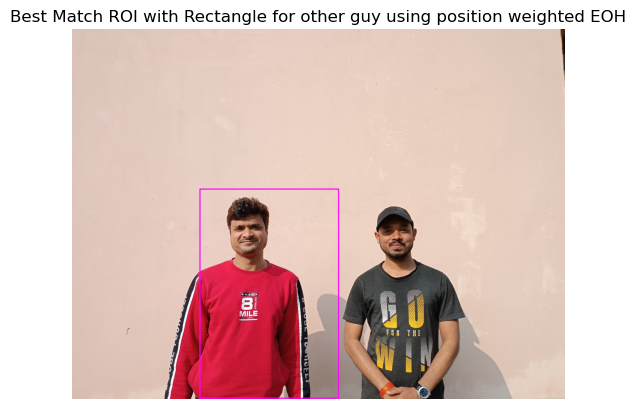

In [10]:
def calculate_bhattacharyya_coefficient(hist1, hist2):
    # Calculate Bhattacharyya coefficient between two histograms
    coeff = np.sum(np.sqrt(hist1 * hist2))
    return coeff

def find_best_match_roi(image, reference_roi, stride, num_bins=180):
    # Get the dimensions of the reference ROI
    ref_height, ref_width = reference_roi.shape[:2]

    # Initialize variables to store the best match information
    best_match_coefficient = 0
    best_match_position = None

    # Iterate over the image with the given stride
    for y in range(0, image.shape[0] - ref_height + 1, stride[0]):
        for x in range(0, image.shape[1] - ref_width + 1, stride[1]):
            # Extract the current ROI
            current_roi = image[y:y+ref_height, x:x+ref_width]

            # Calculate the combined histogram for the current ROI
            hist_current_roi,_ = calculate_position_weighted_edge_orientation_histogram(current_roi, num_bins)

            # Calculate Bhattacharyya coefficient between histograms
            coeff = calculate_bhattacharyya_coefficient(hist_current_roi, reference_histogram)

            # Update best match information if a better match is found
            if coeff > best_match_coefficient:
                best_match_coefficient = coeff
                best_match_position = (x, y)

    return best_match_position

def draw_rectangle(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x + ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

def draw_rectangle1(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x - ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

# Load the input image and reference ROI
input_image = img_b
reference_roi = shayan1

# Set the stride and number of bins
stride = (500,500)
num_bins = 180

# Calculate the reference histogram
reference_histogram,_ = calculate_position_weighted_edge_orientation_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride, num_bins)

# Draw the rectangle on the input image
output_image = draw_rectangle(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI for Shayan using position weighted EOH')
plt.axis('off')
plt.show()

reference_roi = other1

stride = (500,500)

reference_histogram,_ = calculate_position_weighted_edge_orientation_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride, num_bins)

# Draw the rectangle on the input image
output_image = draw_rectangle1(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI with Rectangle for other guy using position weighted EOH')
plt.axis('off')
plt.show()


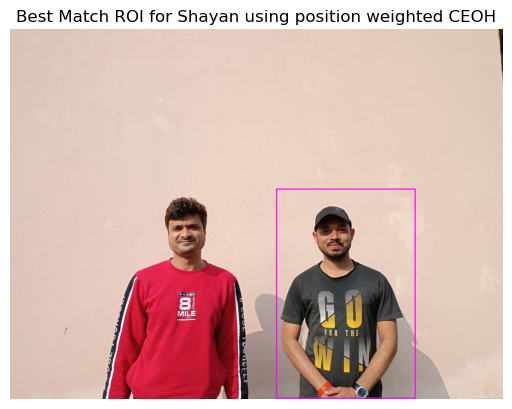

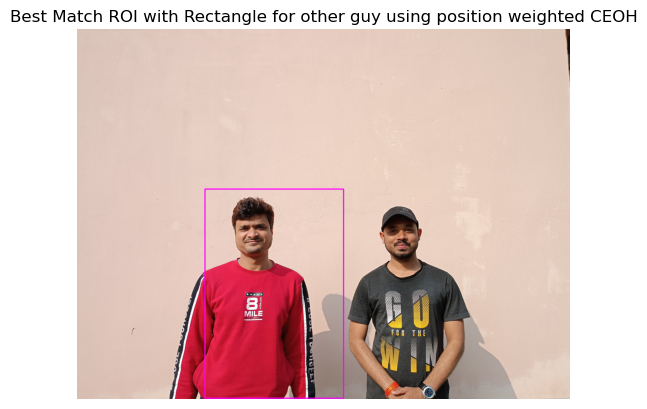

In [11]:
def calculate_bhattacharyya_coefficient(hist1, hist2):
    # Calculate Bhattacharyya coefficient between two histograms
    coeff = np.sum(np.sqrt(hist1 * hist2))
    return coeff

def find_best_match_roi(image, reference_roi, stride, num_bins=180):
    # Get the dimensions of the reference ROI
    ref_height, ref_width = reference_roi.shape[:2]

    # Initialize variables to store the best match information
    best_match_coefficient = 0
    best_match_position = None

    # Iterate over the image with the given stride
    for y in range(0, image.shape[0] - ref_height + 1, stride[0]):
        for x in range(0, image.shape[1] - ref_width + 1, stride[1]):
            # Extract the current ROI
            current_roi = image[y:y+ref_height, x:x+ref_width]

            # Calculate the combined histogram for the current ROI
            hist_current_roi = calculate_position_weighted_combined_histogram(current_roi, num_bins)

            # Calculate Bhattacharyya coefficient between histograms
            coeff = calculate_bhattacharyya_coefficient(hist_current_roi, reference_histogram)

            # Update best match information if a better match is found
            if coeff > best_match_coefficient:
                best_match_coefficient = coeff
                best_match_position = (x, y)

    return best_match_position

def draw_rectangle(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x + ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

def draw_rectangle1(image, position, ref_height, ref_width):
    # Draw a rectangle around the identified ROI in the output image
    output_image = image.copy()
    x, y = position
    cv2.rectangle(output_image, (x, y), (x - ref_width, y + ref_height), (255, 0, 255), 10)
    return output_image

# Load the input image and reference ROI
input_image = img_b
reference_roi = shayan1

# Set the stride and number of bins
stride = (500,500)
num_bins = 180

# Calculate the reference histogram
reference_histogram = calculate_position_weighted_combined_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride, num_bins)

# Draw the rectangle on the input image
output_image = draw_rectangle(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI for Shayan using position weighted CEOH')
plt.axis('off')
plt.show()

reference_roi = other1

stride = (500,500)

reference_histogram = calculate_position_weighted_combined_histogram(reference_roi, num_bins)

# Find the best match ROI position
best_match_position = find_best_match_roi(input_image, reference_roi, stride, num_bins)

# Draw the rectangle on the input image
output_image = draw_rectangle1(input_image, best_match_position, reference_roi.shape[0], reference_roi.shape[1])

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Best Match ROI with Rectangle for other guy using position weighted CEOH')
plt.axis('off')
plt.show()